# Final Project - Analyzing Master's Programs Worldwide

## March 12th, 2020

### By: Emily Curcio, Koushik Manjunath, Xiumin (Echo) Sun, Zhanfeng (Jeffrey) Zhao

# 1.0 Data Description
This dataset contains information regarding Master’s degree programs from around the world, including 99 different countries, with about 40% of the programs being in the US.  It started with 23 columns and about 60,000 rows.

# 2.0 Data Clean-Up/Preparation

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import re

import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [3]:
# Load data
df = pd.read_csv('project.csv')
df.head()

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,tution_1_currency,tution_1_money,tution_1_type,tution_2_currency,tution_2_money,tution_2_type,tuition_price_specification,start_date,ielts_score,structure,academic_req,facts,city,program_url
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,EUR,6442.0,International,EUR,2108.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...
1,Armenia,ARM,American University of Armenia,NaN,Political Science and International Affairs,Master,2031-07-18T00:00:00Z,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),2018-08-22 00:00:00,6.5,NaN,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71085/poli...
2,Armenia,ARM,American University of Armenia,NaN,Business Administration,MBA,2004-07-18T00:00:00Z,NaN,English,EUR,7497.0,International,EUR,2499.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Managers with practical knowledge of account...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71102/busi...
3,Armenia,ARM,American University of Armenia,NaN,Computer and Information Science,MSc,NaN,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),NaN,6.5,['Introduction to Object-Oriented Programming'...,"<section id=""AcademicRequirements""> <h2>Academ...",['Deadline and start date Application deadline...,['Yerevan'],http://www.mastersportal.eu/studies/71104/comp...
4,Armenia,ARM,American University of Armenia,NaN,Industrial Engineering and Systems Management,MEng,2031-07-18T00:00:00Z,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),2018-08-22 00:00:00,6.5,"['Probability Theory', 'Analysis and Design of...","<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71103/indu...


In [4]:
df.shape

(60425, 23)

## 2.1 Convert Currencies to USD

Normalize all of the currency to USD using exchange rates from when the dataset was created in 2018.  Exchange rates taken on Jan 1st, 2018 from https://www.xe.com/currencytables/?from=USD&date=2018-01-01.
* 1 EUR = 1.20 USD
* 1 AUD = 0.78 USD
* 1 GBP = 1.35 USD
* 1 CAD = 0.79 USD
* nan = nan
* Free = 0

In [5]:
# Current currencies used in dataset
df['tution_1_currency'].unique()

array(['EUR', 'AUD', nan, 'USD', 'GBP', 'Free', 'CAD'], dtype=object)

In [6]:
df['tution_2_currency'].unique()

array(['EUR', nan, 'AUD', 'USD', 'GBP', 'Free', 'CAD'], dtype=object)

In [7]:
# Create column with conversion rates for the tution_1_money column
df['conversion1'] = df.tution_1_currency.apply(lambda x: 1.0 if x == 'USD'\
                                               else 1.20 if x == 'EUR' \
                                               else 0.78 if x == 'AUD' \
                                               else 1.35 if x == 'GBP' \
                                               else 0.79 if x == 'CAD' \
                                               else 0 if x == 'Free' \
                                               else np.nan)

In [8]:
# Check conversion1 column was added
df.head(1)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,tution_1_currency,tution_1_money,tution_1_type,tution_2_currency,tution_2_money,tution_2_type,tuition_price_specification,start_date,ielts_score,structure,academic_req,facts,city,program_url,conversion1
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,EUR,6442.0,International,EUR,2108.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,1.2


In [9]:
# Create new tuition_1_USD column for the tuition_1_money converted to USD
df['tuition_1_USD'] = df.tution_1_money * df.conversion1

In [10]:
# Check that it worked
df.head()

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,tution_1_currency,tution_1_money,tution_1_type,tution_2_currency,tution_2_money,tution_2_type,tuition_price_specification,start_date,ielts_score,structure,academic_req,facts,city,program_url,conversion1,tuition_1_USD
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,EUR,6442.0,International,EUR,2108.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,1.2,7730.4
1,Armenia,ARM,American University of Armenia,NaN,Political Science and International Affairs,Master,2031-07-18T00:00:00Z,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),2018-08-22 00:00:00,6.5,NaN,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71085/poli...,1.2,7560.0
2,Armenia,ARM,American University of Armenia,NaN,Business Administration,MBA,2004-07-18T00:00:00Z,NaN,English,EUR,7497.0,International,EUR,2499.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Managers with practical knowledge of account...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71102/busi...,1.2,8996.4
3,Armenia,ARM,American University of Armenia,NaN,Computer and Information Science,MSc,NaN,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),NaN,6.5,['Introduction to Object-Oriented Programming'...,"<section id=""AcademicRequirements""> <h2>Academ...",['Deadline and start date Application deadline...,['Yerevan'],http://www.mastersportal.eu/studies/71104/comp...,1.2,7560.0
4,Armenia,ARM,American University of Armenia,NaN,Industrial Engineering and Systems Management,MEng,2031-07-18T00:00:00Z,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),2018-08-22 00:00:00,6.5,"['Probability Theory', 'Analysis and Design of...","<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71103/indu...,1.2,7560.0


In [11]:
# Move tution_1_type column to end of dataframe so that it is next to the new tuition_1_USD column
df['tuition_1_type'] = df.tution_1_type

In [12]:
# Check that it was moved
df.head(1)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,tution_1_currency,tution_1_money,tution_1_type,tution_2_currency,tution_2_money,tution_2_type,tuition_price_specification,start_date,ielts_score,structure,academic_req,facts,city,program_url,conversion1,tuition_1_USD,tuition_1_type
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,EUR,6442.0,International,EUR,2108.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,1.2,7730.4,International


In [13]:
# Create column with conversion rates for the tution_2_money column
df['conversion2'] = df.tution_2_currency.apply(lambda x: 1.0 if x == 'USD'\
                                               else 1.20 if x == 'EUR' \
                                               else 0.78 if x == 'AUD' \
                                               else 1.35 if x == 'GBP' \
                                               else 0.79 if x == 'CAD' \
                                               else 0 if x == 'Free' \
                                               else np.nan)

In [14]:
# Check that conversion2 column was added
df.head(1)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,tution_1_currency,tution_1_money,tution_1_type,tution_2_currency,tution_2_money,tution_2_type,tuition_price_specification,start_date,ielts_score,structure,academic_req,facts,city,program_url,conversion1,tuition_1_USD,tuition_1_type,conversion2
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,EUR,6442.0,International,EUR,2108.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,1.2,7730.4,International,1.2


In [15]:
# Create new tuition_2_USD column for the tuition_2_money converted to USD
df['tuition_2_USD'] = df.tution_2_money * df.conversion2

In [16]:
# Check that it worked
df.head()

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,tution_1_currency,tution_1_money,tution_1_type,tution_2_currency,tution_2_money,tution_2_type,tuition_price_specification,start_date,ielts_score,structure,academic_req,facts,city,program_url,conversion1,tuition_1_USD,tuition_1_type,conversion2,tuition_2_USD
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,EUR,6442.0,International,EUR,2108.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,1.2,7730.4,International,1.2,2529.6
1,Armenia,ARM,American University of Armenia,NaN,Political Science and International Affairs,Master,2031-07-18T00:00:00Z,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),2018-08-22 00:00:00,6.5,NaN,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71085/poli...,1.2,7560.0,International,1.2,3000.0
2,Armenia,ARM,American University of Armenia,NaN,Business Administration,MBA,2004-07-18T00:00:00Z,NaN,English,EUR,7497.0,International,EUR,2499.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Managers with practical knowledge of account...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71102/busi...,1.2,8996.4,International,1.2,2998.8
3,Armenia,ARM,American University of Armenia,NaN,Computer and Information Science,MSc,NaN,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),NaN,6.5,['Introduction to Object-Oriented Programming'...,"<section id=""AcademicRequirements""> <h2>Academ...",['Deadline and start date Application deadline...,['Yerevan'],http://www.mastersportal.eu/studies/71104/comp...,1.2,7560.0,International,1.2,3000.0
4,Armenia,ARM,American University of Armenia,NaN,Industrial Engineering and Systems Management,MEng,2031-07-18T00:00:00Z,24 months,English,EUR,6300.0,International,EUR,2500.0,National,Tuition (Year),2018-08-22 00:00:00,6.5,"['Probability Theory', 'Analysis and Design of...","<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71103/indu...,1.2,7560.0,International,1.2,3000.0


In [17]:
# Move tution_2_type column to end of dataframe so that it is next to the new tuition_2_USD column
df['tuition_2_type'] = df.tution_2_type

In [18]:
# Move tuition_price_specification column to the end next to the other tuition related columns
df['tuition_price_specifications'] = df.tuition_price_specification

In [19]:
# Check that they were moved
df.head(1)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,tution_1_currency,tution_1_money,tution_1_type,tution_2_currency,tution_2_money,tution_2_type,tuition_price_specification,start_date,ielts_score,structure,academic_req,facts,city,program_url,conversion1,tuition_1_USD,tuition_1_type,conversion2,tuition_2_USD,tuition_2_type,tuition_price_specifications
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,EUR,6442.0,International,EUR,2108.0,EU/EEA,Tuition (Year),2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,1.2,7730.4,International,1.2,2529.6,EU/EEA,Tuition (Year)


In [20]:
# Delete old columns
df.drop(['tution_1_currency', 'tution_1_money', 'tution_1_type', \
            'tution_2_currency', 'tution_2_money', 'tution_2_type', \
                'conversion1', 'conversion2', 'tuition_price_specification'], axis = 1, inplace = True)

In [21]:
# Final check
df.head(1)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,start_date,ielts_score,structure,academic_req,facts,city,program_url,tuition_1_USD,tuition_1_type,tuition_2_USD,tuition_2_type,tuition_price_specifications
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,7730.4,International,2529.6,EU/EEA,Tuition (Year)


## 2.2 Total Tuition Calculation

Use the tuition columns, tuition_price_specifications column, and duration column to find the total tuition for as many programs as possible.

First, clean up duration column so that everything is in months.
* 1 month = 1 month
* 1 day = 0.03 months
* NaN and numbers without units will be NaN

In [22]:
# Create column with time conversion for duration column
df['duration_conversion'] = df.duration.apply(lambda x: 1 if 'month' in str(x) \
                                              else 0.03 if 'day' in str(x) \
                                              else np.nan)

In [23]:
df.head(3)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,start_date,ielts_score,structure,academic_req,facts,city,program_url,tuition_1_USD,tuition_1_type,tuition_2_USD,tuition_2_type,tuition_price_specifications,duration_conversion
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,7730.4,International,2529.6,EU/EEA,Tuition (Year),NaN
1,Armenia,ARM,American University of Armenia,NaN,Political Science and International Affairs,Master,2031-07-18T00:00:00Z,24 months,English,2018-08-22 00:00:00,6.5,NaN,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71085/poli...,7560.0,International,3000.0,National,Tuition (Year),1.0
2,Armenia,ARM,American University of Armenia,NaN,Business Administration,MBA,2004-07-18T00:00:00Z,NaN,English,2018-09-01 00:00:00,6.5,['Managers with practical knowledge of account...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71102/busi...,8996.4,International,2998.8,EU/EEA,Tuition (Year),NaN


In [24]:
# Extract number only from duration column
df['duration_num'] = df.duration.dropna().apply(lambda x: re.findall(r"\d+\.?\d*", x))
df['duration_num'] = df.duration_num.dropna().apply(lambda x: int(x[0]))

In [25]:
df.head(3)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,start_date,ielts_score,structure,academic_req,facts,city,program_url,tuition_1_USD,tuition_1_type,tuition_2_USD,tuition_2_type,tuition_price_specifications,duration_conversion,duration_num
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,7730.4,International,2529.6,EU/EEA,Tuition (Year),NaN,NaN
1,Armenia,ARM,American University of Armenia,NaN,Political Science and International Affairs,Master,2031-07-18T00:00:00Z,24 months,English,2018-08-22 00:00:00,6.5,NaN,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71085/poli...,7560.0,International,3000.0,National,Tuition (Year),1.0,24.0
2,Armenia,ARM,American University of Armenia,NaN,Business Administration,MBA,2004-07-18T00:00:00Z,NaN,English,2018-09-01 00:00:00,6.5,['Managers with practical knowledge of account...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71102/busi...,8996.4,International,2998.8,EU/EEA,Tuition (Year),NaN,NaN


In [26]:
# Create duration in months column
df['duration_months'] = df.duration_conversion * df.duration_num

In [27]:
df.head(3)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,duration,language,start_date,ielts_score,structure,academic_req,facts,city,program_url,tuition_1_USD,tuition_1_type,tuition_2_USD,tuition_2_type,tuition_price_specifications,duration_conversion,duration_num,duration_months
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,NaN,English,2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,7730.4,International,2529.6,EU/EEA,Tuition (Year),NaN,NaN,NaN
1,Armenia,ARM,American University of Armenia,NaN,Political Science and International Affairs,Master,2031-07-18T00:00:00Z,24 months,English,2018-08-22 00:00:00,6.5,NaN,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71085/poli...,7560.0,International,3000.0,National,Tuition (Year),1.0,24.0,24.0
2,Armenia,ARM,American University of Armenia,NaN,Business Administration,MBA,2004-07-18T00:00:00Z,NaN,English,2018-09-01 00:00:00,6.5,['Managers with practical knowledge of account...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71102/busi...,8996.4,International,2998.8,EU/EEA,Tuition (Year),NaN,NaN,NaN


In [28]:
# Delete old columns
df.drop(['duration_conversion', 'duration_num', 'duration'], axis = 1, inplace = True)

In [29]:
df.head(1)

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,language,start_date,ielts_score,structure,academic_req,facts,city,program_url,tuition_1_USD,tuition_1_type,tuition_2_USD,tuition_2_type,tuition_price_specifications,duration_months
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,English,2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,7730.4,International,2529.6,EU/EEA,Tuition (Year),NaN


Then, calculate the total tuition by total_tuition = (tuition / tuition_price_specifications_conv) * duration_months.  Where tuition_price_specifications_conv is as follows:
* Tuition (Year) --> 12
* Tuition (Semester) --> 6
* Tuition (Full programme) --> NaN
* Tuition (Trimester) --> 3
* Tuition (Month) --> 1
* Tuition (Quarter) --> 4
* Tuition (Credit) --> NaN
* Tuition (Module --> NaN

In [30]:
df['tuition_price_specifications_conv'] = df.tuition_price_specifications.apply(lambda x: \
                                                                               12 if x == 'Tuition (Year)' \
                                                                               else 6 if x == 'Tuition (Semester)' \
                                                                               else 3 if x == 'Tuition (Trimester)' \
                                                                               else 1 if x == 'Tuition (Month)' \
                                                                               else 4 if x == 'Tuition (Quarter)' \
                                                                               else np.nan)

In [31]:
# Calculate for tuition 1
df['total_tuition_1_USD'] = (df.tuition_1_USD / df.tuition_price_specifications_conv) * df.duration_months

In [32]:
# Add tuition amounts that were of type Tuition (Full programme) to the new total tuition column
df.loc[df.tuition_price_specifications == 'Tuition (Full programme)', 'total_tuition_1_USD'] = \
    df[df.tuition_price_specifications == 'Tuition (Full programme)'].tuition_1_USD

In [33]:
# Calculate for tuition 2
df['total_tuition_2_USD'] = (df.tuition_2_USD / df.tuition_price_specifications_conv) * df.duration_months

In [34]:
# Add tuition amounts that were of type Tuition (Full programme) to the new total tuition column
df.loc[df.tuition_price_specifications == 'Tuition (Full programme)', 'total_tuition_2_USD'] = \
    df[df.tuition_price_specifications == 'Tuition (Full programme)'].tuition_2_USD

In [35]:
# Check
df.head()

,country_name,country_code,university_name,university_rank,program_name,program_type,deadline,language,start_date,ielts_score,structure,academic_req,facts,city,program_url,tuition_1_USD,tuition_1_type,tuition_2_USD,tuition_2_type,tuition_price_specifications,duration_months,tuition_price_specifications_conv,total_tuition_1_USD,total_tuition_2_USD
0,Armenia,ARM,American University of Armenia,NaN,Economics,MSc,2004-07-18T00:00:00Z,English,2018-09-01 00:00:00,6.5,['Quantitative Methods for Economists (Mathema...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71101/econ...,7730.4,International,2529.6,EU/EEA,Tuition (Year),NaN,12.0,NaN,NaN
1,Armenia,ARM,American University of Armenia,NaN,Political Science and International Affairs,Master,2031-07-18T00:00:00Z,English,2018-08-22 00:00:00,6.5,NaN,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71085/poli...,7560.0,International,3000.0,National,Tuition (Year),24.0,12.0,15120.0,6000.0
2,Armenia,ARM,American University of Armenia,NaN,Business Administration,MBA,2004-07-18T00:00:00Z,English,2018-09-01 00:00:00,6.5,['Managers with practical knowledge of account...,"<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-09-01 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71102/busi...,8996.4,International,2998.8,EU/EEA,Tuition (Year),NaN,12.0,NaN,NaN
3,Armenia,ARM,American University of Armenia,NaN,Computer and Information Science,MSc,NaN,English,NaN,6.5,['Introduction to Object-Oriented Programming'...,"<section id=""AcademicRequirements""> <h2>Academ...",['Deadline and start date Application deadline...,['Yerevan'],http://www.mastersportal.eu/studies/71104/comp...,7560.0,International,3000.0,National,Tuition (Year),24.0,12.0,15120.0,6000.0
4,Armenia,ARM,American University of Armenia,NaN,Industrial Engineering and Systems Management,MEng,2031-07-18T00:00:00Z,English,2018-08-22 00:00:00,6.5,"['Probability Theory', 'Analysis and Design of...","<section id=""AcademicRequirements""> <h2>Academ...",['Starting in 2018-08-22 00:00:00 You can...,['Yerevan'],http://www.mastersportal.eu/studies/71103/indu...,7560.0,International,3000.0,National,Tuition (Year),24.0,12.0,15120.0,6000.0


In [36]:
# Remove tuition_price_specifications_conv column
df.drop('tuition_price_specifications_conv', axis = 1, inplace = True)

## 2.3 String Cleaning

In [37]:
clean = re.compile('<.*?>')
df['academic_req'] = df.academic_req.dropna().apply(lambda x: re.sub(clean, ' ', x))

In [38]:
df['city'] = df.city.dropna().apply(lambda x: x.strip("[]"))

In [39]:
df['structure'] = df.structure.dropna().apply(lambda x: x.strip("[]''"))

In [40]:
df['facts'] = df.facts.dropna().apply(lambda x: x.strip("[]''"))
df['facts'] = df.facts.dropna().apply(lambda x: x.replace("\\\\xa0", " "))

## 2.5 Drop Useless Columns

In [41]:
df.columns

Index(['country_name', 'country_code', 'university_name', 'university_rank',
       'program_name', 'program_type', 'deadline', 'language', 'start_date',
       'ielts_score', 'structure', 'academic_req', 'facts', 'city',
       'program_url', 'tuition_1_USD', 'tuition_1_type', 'tuition_2_USD',
       'tuition_2_type', 'tuition_price_specifications', 'duration_months',
       'total_tuition_1_USD', 'total_tuition_2_USD'],
      dtype='object')

In [42]:
df.drop(['deadline', 'start_date', 'program_url', 'country_code'], axis = 1, inplace = True)

## 2.6 Restructure dataset so that there is only one column for tuition

In [43]:
df.head(1)

,country_name,university_name,university_rank,program_name,program_type,language,ielts_score,structure,academic_req,facts,city,tuition_1_USD,tuition_1_type,tuition_2_USD,tuition_2_type,tuition_price_specifications,duration_months,total_tuition_1_USD,total_tuition_2_USD
0,Armenia,American University of Armenia,NaN,Economics,MSc,English,6.5,Quantitative Methods for Economists (Mathemati...,Academic Requirements Application Requ...,Starting in 2018-09-01 00:00:00 You can a...,'Yerevan',7730.4,International,2529.6,EU/EEA,Tuition (Year),NaN,NaN,NaN


In [44]:
# df1 has info on tuition 1
df1 = df.drop(['tuition_2_USD', 'tuition_2_type', 'total_tuition_2_USD'], axis = 1). \
    rename(columns = {'tuition_1_USD':'tuition_USD', 'tuition_1_type':'tuition_type', \
            'total_tuition_1_USD':'total_tuition_USD'})
df1.head(1)

,country_name,university_name,university_rank,program_name,program_type,language,ielts_score,structure,academic_req,facts,city,tuition_USD,tuition_type,tuition_price_specifications,duration_months,total_tuition_USD
0,Armenia,American University of Armenia,NaN,Economics,MSc,English,6.5,Quantitative Methods for Economists (Mathemati...,Academic Requirements Application Requ...,Starting in 2018-09-01 00:00:00 You can a...,'Yerevan',7730.4,International,Tuition (Year),NaN,NaN


In [45]:
# df2 has info on tuition 2
df2 = df.drop(['tuition_1_USD', 'tuition_1_type', 'total_tuition_1_USD'], axis = 1). \
    rename(columns = {'tuition_2_USD':'tuition_USD', 'tuition_2_type':'tuition_type', \
            'total_tuition_2_USD':'total_tuition_USD'})
df2.head(1)

,country_name,university_name,university_rank,program_name,program_type,language,ielts_score,structure,academic_req,facts,city,tuition_USD,tuition_type,tuition_price_specifications,duration_months,total_tuition_USD
0,Armenia,American University of Armenia,NaN,Economics,MSc,English,6.5,Quantitative Methods for Economists (Mathemati...,Academic Requirements Application Requ...,Starting in 2018-09-01 00:00:00 You can a...,'Yerevan',2529.6,EU/EEA,Tuition (Year),NaN,NaN


In [46]:
# Stack df1 and df2
df = pd.concat([df1, df2], axis = 0)
df.head(1)

,country_name,university_name,university_rank,program_name,program_type,language,ielts_score,structure,academic_req,facts,city,tuition_USD,tuition_type,tuition_price_specifications,duration_months,total_tuition_USD
0,Armenia,American University of Armenia,NaN,Economics,MSc,English,6.5,Quantitative Methods for Economists (Mathemati...,Academic Requirements Application Requ...,Starting in 2018-09-01 00:00:00 You can a...,'Yerevan',7730.4,International,Tuition (Year),NaN,NaN


In [47]:
# Check
len(df1) + len(df2) == len(df)

True

## 2.7 Check Cleaned Dataset

In [48]:
df.isna().sum().sum()

223669

In [49]:
df.shape

(120850, 16)

In [50]:
df.head()

,country_name,university_name,university_rank,program_name,program_type,language,ielts_score,structure,academic_req,facts,city,tuition_USD,tuition_type,tuition_price_specifications,duration_months,total_tuition_USD
0,Armenia,American University of Armenia,NaN,Economics,MSc,English,6.5,Quantitative Methods for Economists (Mathemati...,Academic Requirements Application Requ...,Starting in 2018-09-01 00:00:00 You can a...,'Yerevan',7730.4,International,Tuition (Year),NaN,NaN
1,Armenia,American University of Armenia,NaN,Political Science and International Affairs,Master,English,6.5,NaN,Academic Requirements Admission Requir...,Starting in 2018-08-22 00:00:00 You can a...,'Yerevan',7560.0,International,Tuition (Year),24.0,15120.0
2,Armenia,American University of Armenia,NaN,Business Administration,MBA,English,6.5,Managers with practical knowledge of accountin...,Academic Requirements Application Requ...,Starting in 2018-09-01 00:00:00 You can a...,'Yerevan',8996.4,International,Tuition (Year),NaN,NaN
3,Armenia,American University of Armenia,NaN,Computer and Information Science,MSc,English,6.5,"Introduction to Object-Oriented Programming', ...",Academic Requirements CIS Application R...,Deadline and start date Application deadline a...,'Yerevan',7560.0,International,Tuition (Year),24.0,15120.0
4,Armenia,American University of Armenia,NaN,Industrial Engineering and Systems Management,MEng,English,6.5,"Probability Theory', 'Analysis and Design of D...",Academic Requirements IESM Application...,Starting in 2018-08-22 00:00:00 You can a...,'Yerevan',7560.0,International,Tuition (Year),24.0,15120.0


## 2.8 Create US Only Dataset

In [51]:
dfUS = df[df.country_name == 'United States']

In [52]:
dfUS.shape

(48168, 16)

# 3.0 Findings

## 3.1 Finding 1: Choosing a Place to Study by IELTS Score in US
**Summary:** Here we will be recommending a target IELTS score for students looking to study in the US based on location, program, and school type.  The IELTS is an English language proficiency test, similar to the TOEFL.

###  3.1.1 Average IELTS Score Requests by State

Merge dfUS with dataset containing university states.

In [53]:
# Load dataset containing universities and the states they are located in
# From https://www.kaggle.com/ghalebdweikat/accredited-universities-in-the-usa
df_states = pd.read_csv('Accreditation_04_2017.csv', usecols = [1, 4])

In [54]:
# Merge the new dataset with original US dataset
df_states.drop_duplicates(subset = 'Institution_Name', inplace = True)
US_State = dfUS.merge(df_states, left_on = 'university_name', right_on = 'Institution_Name', how = 'inner')

In [55]:
# Create dataframe with average IELTS score
US_State_Ielts = US_State.groupby('Institution_State')['ielts_score'].mean()
US_State_Ielts2 = US_State_Ielts.to_frame().reset_index()

(5, 7)

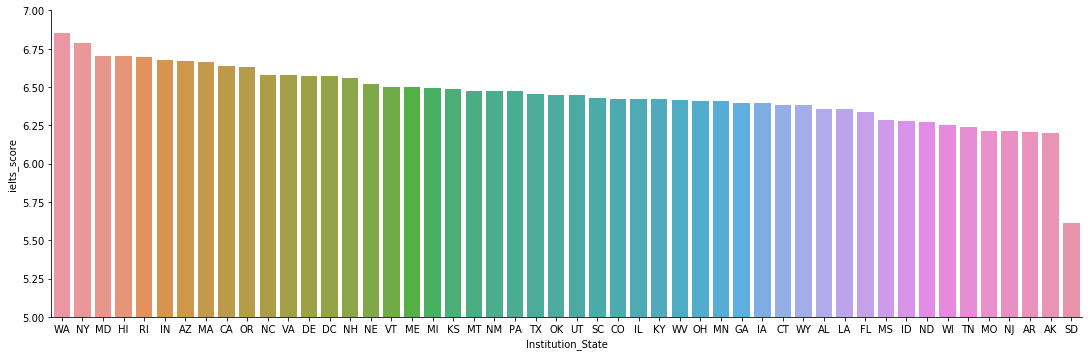

In [56]:
# Plot
sns.catplot(y = 'ielts_score', x = 'Institution_State', data = US_State_Ielts2, \
            aspect = 3, kind = 'bar',order= US_State_Ielts.sort_values(ascending=False).index.values)
plt.ylim([5,7])

We can see that WA has the highest average IELTS score requirement and SD the lowest.

###  3.1.2 Highest IELTS Score Requests by Program

Out of the programs with count over 100 in the US, see which programs have a relatively high IELTS score request.

In [57]:
# Data frame of programs in US with their count, average Ielts score and the highest school rank.
Top_Cate_US = dfUS.groupby(['program_name']).agg({'program_name':'count','ielts_score':'mean', \
                                                  'university_rank':'min'})
Top_Cate_US.columns = ["Count", "Average_Ielts", "Highest_Rank"]
Top_Cate_US = Top_Cate_US.sort_values(by = ['Average_Ielts'], ascending = False)
Top_Cate_US = Top_Cate_US.reset_index()

(6.4, 6.68)

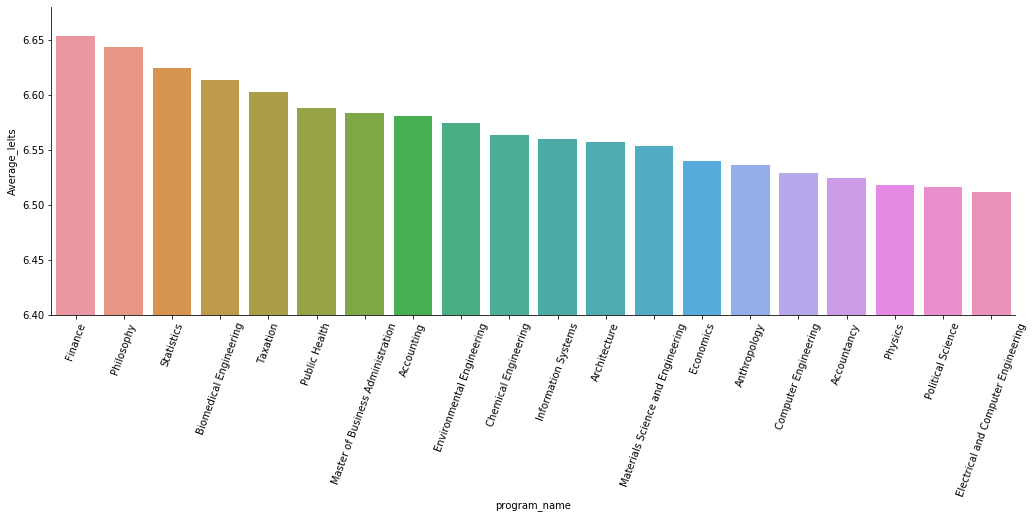

In [58]:
# Plot
import warnings
warnings.filterwarnings('ignore')

chart = sns.factorplot(y = 'Average_Ielts', x = 'program_name', data = Top_Cate_US.loc[Top_Cate_US.Count >= 100] \
               .head(20), kind = 'bar',  aspect = 3)
chart.set_xticklabels(rotation = 70)
plt.ylim([6.4, 6.68])

We can see that Finance programs have the highest average IELTS score requirement and Electrical and Computer Engineering the lowest.

###  3.1.3 Average IELTS Score Requests by School Type

In [59]:
# Import dataset with school type
# Link on kaggle: https://www.kaggle.com/wsj/college-salaries#salaries-by-college-type.csv
df_type = pd.read_csv('salaries-by-college-type.csv', usecols = [0,1])
US_Type = dfUS.merge(df_type, left_on = 'university_name', right_on = 'School Name', how = 'inner') 

In [60]:
# Check
US_Type.head()

,country_name,university_name,university_rank,program_name,program_type,language,ielts_score,structure,academic_req,facts,city,tuition_USD,tuition_type,tuition_price_specifications,duration_months,total_tuition_USD,School Name,School Type
0,United States,University of Akron,NaN,Accountancy,MSc,English,6.5,"Enterprise Systems and Internal Control', 'Con...",Academic Requirements You need the fol...,Starting in 2018-08-10 00:00:00 You can a...,"'Akron', 'United States'",802.0,International,Tuition (Credit),24.0,NaN,University of Akron,State
1,United States,University of Akron,NaN,Accountancy (Accelerated BS ),MSc,English,6.5,"Business Entity Taxation', 'Information System...",Academic Requirements You need the fol...,Starting in 2018-01-10 00:00:00 You can a...,"'Akron', 'United States'",802.0,International,Tuition (Credit),24.0,NaN,University of Akron,State
2,United States,University of Akron,NaN,Information Systems Management,MSc,English,6.5,"Business Database Systems', 'Knowledge Managem...",Academic Requirements You need the fol...,Starting in 2018-01-10 00:00:00 You can a...,"'Akron', 'United States'",802.0,International,Tuition (Credit),24.0,NaN,University of Akron,State
3,United States,University of Akron,NaN,Master of Business Administration - Global Tec...,MBA,English,6.5,"Financial Accounting', 'Managerial Finance', '...",Academic Requirements You need the fol...,Starting in 2018-01-01 00:00:00 You can a...,"'Akron', 'United States'",802.0,International,Tuition (Credit),24.0,NaN,University of Akron,State
4,United States,University of Akron,NaN,Master of Business Administration - Strategic ...,MBA,English,6.5,"Financial Accounting', 'Managerial Finance', '...",Academic Requirements You need the fol...,Starting in 2018-01-01 00:00:00 You can a...,"'Akron', 'United States'",802.0,International,Tuition (Credit),24.0,NaN,University of Akron,State


In [61]:
# Create dataset with School Type and Average Ielts score
US_Type_Ielts = US_Type.groupby('School Type', as_index = False)['ielts_score'].mean()
US_Type_Ielts = US_Type_Ielts.sort_values(by = ['ielts_score'], ascending = False)

In [62]:
# Check
US_Type_Ielts

,School Type,ielts_score
1,Ivy League,7.171756
2,Liberal Arts,6.765625
0,Engineering,6.625000
4,State,6.462747
3,Party,6.386525


(6, 7.25)

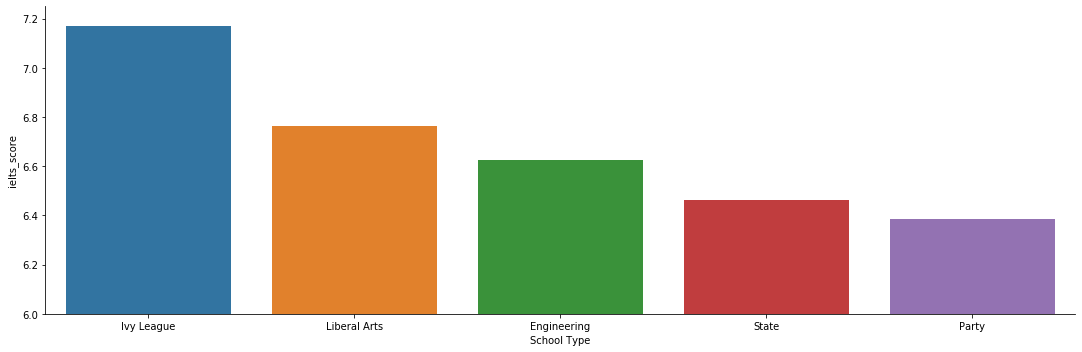

In [63]:
# Plot
sns.catplot(y = 'ielts_score', x = 'School Type', data = US_Type_Ielts,\
            aspect = 3, kind = 'bar')
plt.ylim([6, 7.25])

**Conclusion/Insights:** For a student who wants to apply to Ivy League schools in the Northeastern United States (NY, MD, RI), they should have an IELTS Score of at least 7.  Especially if the student wants to apply to a Finance, Philosophy, or Statistic program.  If the IELTS Score is around 6.5, prospective student should consider applying to State and Party schools in the Southeastern United States (AL, FL, TN) for a better chance at admission. 

## 3.2 Finding 2: Choosing a Place to Study as an International Student in the US
**Summary:** Here we will be looking for the best "bang for the buck" for international students studying in the US based on IELTS score requirements, university rank and total tuition.

Merge dfUS with dataset containing university states.

In [64]:
# Load dataset containing universities and the states they are located in
# From https://www.kaggle.com/ghalebdweikat/accredited-universities-in-the-usa
df_states = pd.read_csv('Accreditation_04_2017.csv', usecols = [1, 4])

In [65]:
# Drop duplicate universities
df_states.drop_duplicates(subset = 'Institution_Name', inplace = True)

In [66]:
# Inner merge with dfUS matching the university names
dfUS2 = dfUS.merge(df_states, left_on = 'university_name', right_on = 'Institution_Name', how = 'left')

### 3.2.1 Top ten states providing the most programs and their average language requirement for international students

In [67]:
# Subset dfUS2 to only show rows with international tuition
dfUS2 = dfUS2[dfUS2.tuition_type == 'International']

In [68]:
# Prepare dataframe for heatmap
df_I2 = dfUS2.groupby('Institution_State').agg({'program_name':'count','ielts_score':'mean'}). \
                rename(columns = {"program_name": "program_num", "ielts_score": "avg_ielts_score"}). \
                sort_values(by = "program_num",ascending = False).head(10)

In [69]:
# Check
df_I2

,program_num,avg_ielts_score
Institution_State,,
NY,990,6.792440
TX,932,6.477778
OH,851,6.422709
FL,785,6.320280
CA,768,6.632062
PA,720,6.543307
MA,707,6.668605
VA,510,6.571942
NJ,483,6.197531


From the table above, we can see that the language requirement is almost the same (around 6.5) for the top ten states which provide the most programs.  So, we will focus more on university rank and tuition within these states...

### 3.2.2 University rank VS total tution for international students

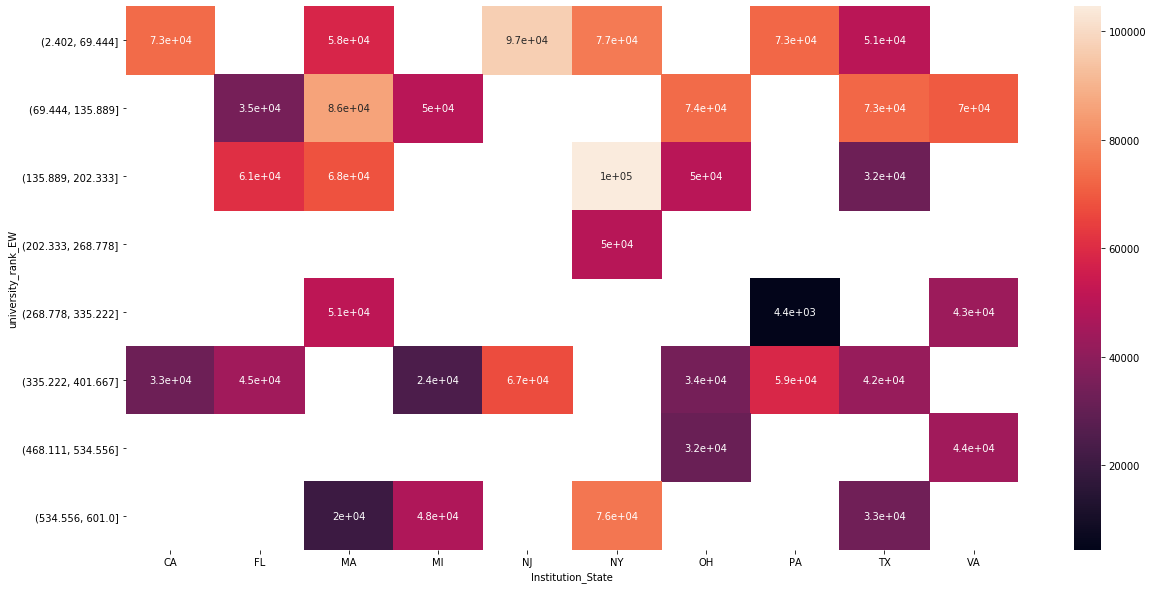

In [70]:
# Heatmap
State = df_I2.index
df2 = dfUS2[dfUS2.Institution_State.apply(lambda x: x in State)]
df2['university_rank_EW'] = pd.cut(df2.university_rank, 9)
groupby_cs = df2.groupby(['university_rank_EW', 'Institution_State'])['total_tuition_USD'].mean()
plt.subplots(figsize = (20, 10))
sns.heatmap(groupby_cs.unstack(), annot = True)

We can see that FL has one of the best deals in terms of highest ranking and lowest tuition combination, so let's take a closer look at the universities in FL...

###  3.2.3 Top three best cost performance univiersities for the international student in FL

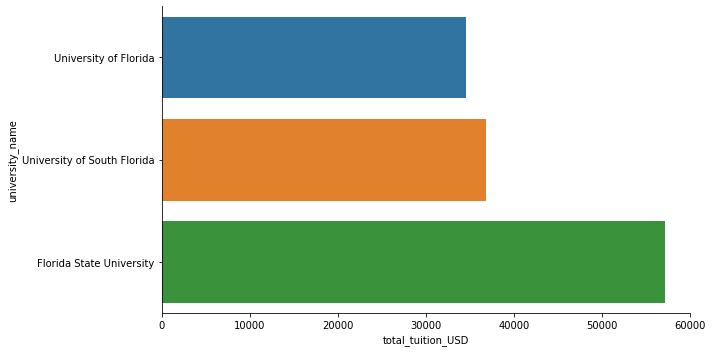

In [71]:
# Plot
df_FL = dfUS2[(dfUS2.Institution_State.apply(lambda x: x == 'FL')) & (dfUS2.university_rank < 300)]
df_FL = pd.DataFrame(df_FL.groupby('university_name').total_tuition_USD.mean().nsmallest(3))
df_FL.reset_index(inplace = True)
sns.catplot(y = 'university_name', x = 'total_tuition_USD', data = df_FL, aspect = 2, kind = 'bar')

**Conclusion/Insights:** Narrowing down universities based on IELTS score requirements, then rank and total tuition, University of Florida and University of South Florida are the best cost performance univeristies for international students looking to study in the US.

## 3.3 Finding 3: Choosing a School Based on Your Potential Future Salary
**Summary:** Here we will be identifying the important factors in choosing a university with the goal of having a future starting salary of at least $50,000.

Merge dfUS with dataset on starting median salaries by univeristy.

In [72]:
# Load dataset containing universities and the starting median salaries of students graduating from them
# Link to Kaggle: https://www.kaggle.com/wsj/college-salaries#salaries-by-college-type.csv
df_salaries = pd.read_csv('salaries-by-college-type.csv', usecols = [0, 1, 2])

In [73]:
df_salaries.shape

(269, 3)

In [74]:
df_salaries.head()

,School Name,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00"
2,Harvey Mudd College,Engineering,"$71,800.00"
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00"
4,Cooper Union,Engineering,"$62,200.00"


In [75]:
# Drop duplicate universities if any
df_salaries.drop_duplicates(subset = 'School Name', inplace = True)

In [76]:
df_salaries.shape

(249, 3)

In [77]:
len(dfUS)

48168

In [78]:
len(df_salaries)

249

In [79]:
# Merge dfUS with df_salaries
df_tree = dfUS.merge(df_salaries, left_on = 'university_name', right_on = 'School Name', how = 'inner')

In [80]:
len(df_tree)

6920

Clean/prepare for decision tree.

Drop useless columns.

In [81]:
df_tree.drop(['country_name', 'university_name', 'program_type', 'language', 'structure', \
              'academic_req', 'facts', 'city', 'tuition_USD', 'tuition_price_specifications', \
              'School Name'], \
             axis = 1, inplace = True)

In [82]:
df_tree.head(1)

,university_rank,program_name,ielts_score,tuition_type,duration_months,total_tuition_USD,School Type,Starting Median Salary
0,NaN,Accountancy,6.5,International,24.0,NaN,State,"$41,100.00"


Clean Starting Median Salary column so it is type float.

In [83]:
df_tree['Starting Median Salary'] = df_tree['Starting Median Salary'].apply(lambda x: x.replace(',', ''))

In [84]:
df_tree['Starting Median Salary'] = df_tree['Starting Median Salary'].apply(lambda x: float(x.replace('$', '')))

In [85]:
# Check
df_tree['Starting Median Salary'].head()

0    41100.0
1    41100.0
2    41100.0
3    41100.0
4    41100.0
Name: Starting Median Salary, dtype: float64

Make Starting Median Salary binary.

In [86]:
df_tree['StartingMedianSalary>=50000'] = df_tree['Starting Median Salary']. \
    apply(lambda x: 1.0 if x >= 50000 else 0)

In [87]:
df_tree.drop('Starting Median Salary', axis = 1, inplace = True)

In [88]:
df_tree.head()

,university_rank,program_name,ielts_score,tuition_type,duration_months,total_tuition_USD,School Type,StartingMedianSalary>=50000
0,NaN,Accountancy,6.5,International,24.0,NaN,State,0.0
1,NaN,Accountancy (Accelerated BS ),6.5,International,24.0,NaN,State,0.0
2,NaN,Information Systems Management,6.5,International,24.0,NaN,State,0.0
3,NaN,Master of Business Administration - Global Tec...,6.5,International,24.0,NaN,State,0.0
4,NaN,Master of Business Administration - Strategic ...,6.5,International,24.0,NaN,State,0.0


Because many missing values, make university rank binary.

In [89]:
df_tree['university_rank_top100'] = df_tree.university_rank.apply(lambda x: 1 if x < 100 else 0)

In [90]:
df_tree.head()

,university_rank,program_name,ielts_score,tuition_type,duration_months,total_tuition_USD,School Type,StartingMedianSalary>=50000,university_rank_top100
0,NaN,Accountancy,6.5,International,24.0,NaN,State,0.0,0
1,NaN,Accountancy (Accelerated BS ),6.5,International,24.0,NaN,State,0.0,0
2,NaN,Information Systems Management,6.5,International,24.0,NaN,State,0.0,0
3,NaN,Master of Business Administration - Global Tec...,6.5,International,24.0,NaN,State,0.0,0
4,NaN,Master of Business Administration - Strategic ...,6.5,International,24.0,NaN,State,0.0,0


In [91]:
df_tree.drop('university_rank', axis = 1, inplace = True)

Drop rows with missing values.

In [92]:
len(df_tree.dropna(subset = ['total_tuition_USD', 'duration_months', 'ielts_score']))

2110

In [93]:
len(df_tree)

6920

In [94]:
df_tree.dropna(subset = ['total_tuition_USD', 'duration_months', 'ielts_score'], inplace = True)

In [95]:
df_tree.isna().any()

program_name                   False
ielts_score                    False
tuition_type                   False
duration_months                False
total_tuition_USD              False
School Type                    False
StartingMedianSalary>=50000    False
university_rank_top100         False
dtype: bool

In [96]:
df_tree.head(1)

,program_name,ielts_score,tuition_type,duration_months,total_tuition_USD,School Type,StartingMedianSalary>=50000,university_rank_top100
69,Sport ScienceCoaching,6.5,International,24.0,53344.0,State,0.0,0


Make dummy variables for all categorical variables.

In [97]:
df_tree = pd.get_dummies(df_tree, columns = ['program_name', 'tuition_type', 'School Type'])

In [98]:
df_tree.shape

(2110, 756)

Train the decision tree.

In [99]:
dt = tree.DecisionTreeClassifier(max_depth = 2)

In [100]:
type(dt)

sklearn.tree.tree.DecisionTreeClassifier

In [101]:
# X is everything except starting median salary
X = df_tree.drop('StartingMedianSalary>=50000', axis = 1)

In [102]:
Y = df_tree['StartingMedianSalary>=50000']

Build the tree.

In [103]:
dt.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualize the tree.

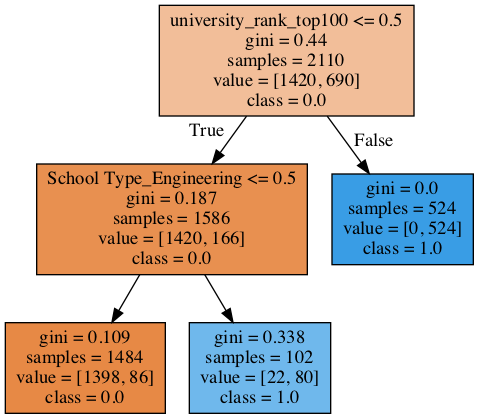

In [104]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Validate the finding.

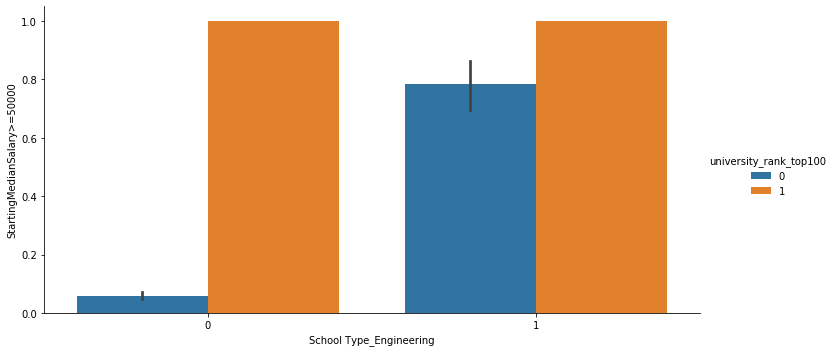

In [105]:
sns.catplot(x = 'School Type_Engineering', y = 'StartingMedianSalary>=50000', \
            hue = 'university_rank_top100', kind = 'bar', data = df_tree, aspect = 2)

**Conclusion/Insights:** If you want to have a starting salary of at least $50,000 you should look for a school with a ranking in the top 100.  Or, if the school is not ranked in the top 100, you should go to an engineering school.